In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X_test = pd.read_csv('Dataset/X_test.csv')
y_test = pd.read_csv('Dataset/y_test.csv').iloc[:, 0]
X_train_100 = pd.read_csv('Dataset/X_train_100.csv')
y_train_100 = pd.read_csv('Dataset/y_train_100.csv').iloc[:, 0]

In [9]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1=manhattan, 2=euclidean
    'algorithm': ['auto'],

}

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)


In [11]:
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

In [12]:
grid_search.fit(X_train_100, y_train_100)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=2)

In [13]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'p': 1, 'weights': 'distance'}


In [14]:
print(grid_search.best_score_)

0.9995883782914451


In [15]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       1.00      1.00      1.00      3497
           2       0.93      0.99      0.96       298
           3       0.76      1.00      0.86        16
           4       1.00      1.00      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.94      1.00      0.96     37792
weighted avg       1.00      1.00      1.00     37792



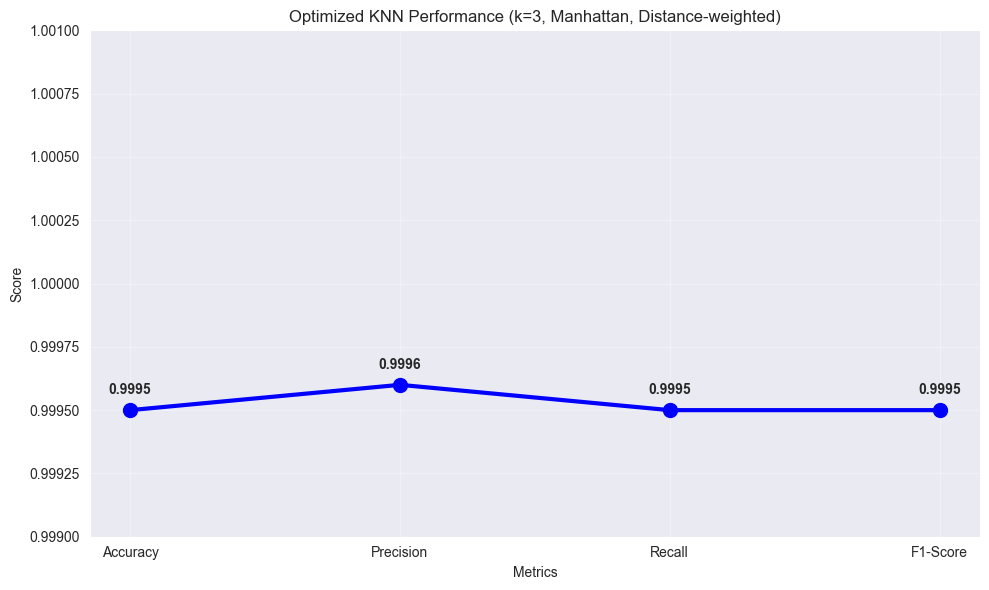

Best Parameters:
• n_neighbors: 3
• weights: 'distance'
• p: 1 (Manhattan)
• algorithm: 'auto'


In [18]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [0.9995, 0.9996, 0.9995, 0.9995]

plt.figure(figsize=(10, 6))
plt.plot(metrics, scores, marker='o', linewidth=3, markersize=10, color='blue')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Optimized KNN Performance (k=3, Manhattan, Distance-weighted)')
plt.ylim(0.999, 1.001)
plt.grid(True, alpha=0.3)

for i, score in enumerate(scores):
    plt.text(i, score + 0.00005, f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Best parameters
print("Best Parameters:")
print("• n_neighbors: 3")
print("• weights: 'distance'")
print("• p: 1 (Manhattan)")
print("• algorithm: 'auto'")